In [28]:
%pylab inline
import seaborn as sns
import pandas as pd
import proplot as plot
plot.rc.fontname = 'Arial'
plot.rc.large = 20
plot.rc.small = 16
plot.rc.ticklen = 10
plot.rc.tickratio = 0.5
plot.rc.linewidth = 2
plot.rc.margin = 0.1

Populating the interactive namespace from numpy and matplotlib


In [30]:
star_df = pd.read_csv("/staging/as/skchoudh/re-ribo-analysis/hg38/SRP231304/ribotricer_results/SRX7201741_translating_ORFs.tsv", sep="\t").set_index("ORF_ID")
kallisto_df = pd.read_csv("/staging/as/skchoudh/re-ribo-analysis/hg38/SRP231304_kallisto/ribotricer_results/SRX7201741_translating_ORFs.tsv", sep="\t").set_index("ORF_ID")

merged_df = star_df.merge(kallisto_df,  suffixes=['_star', '_kallisto'], left_index=True, right_index=True)


/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


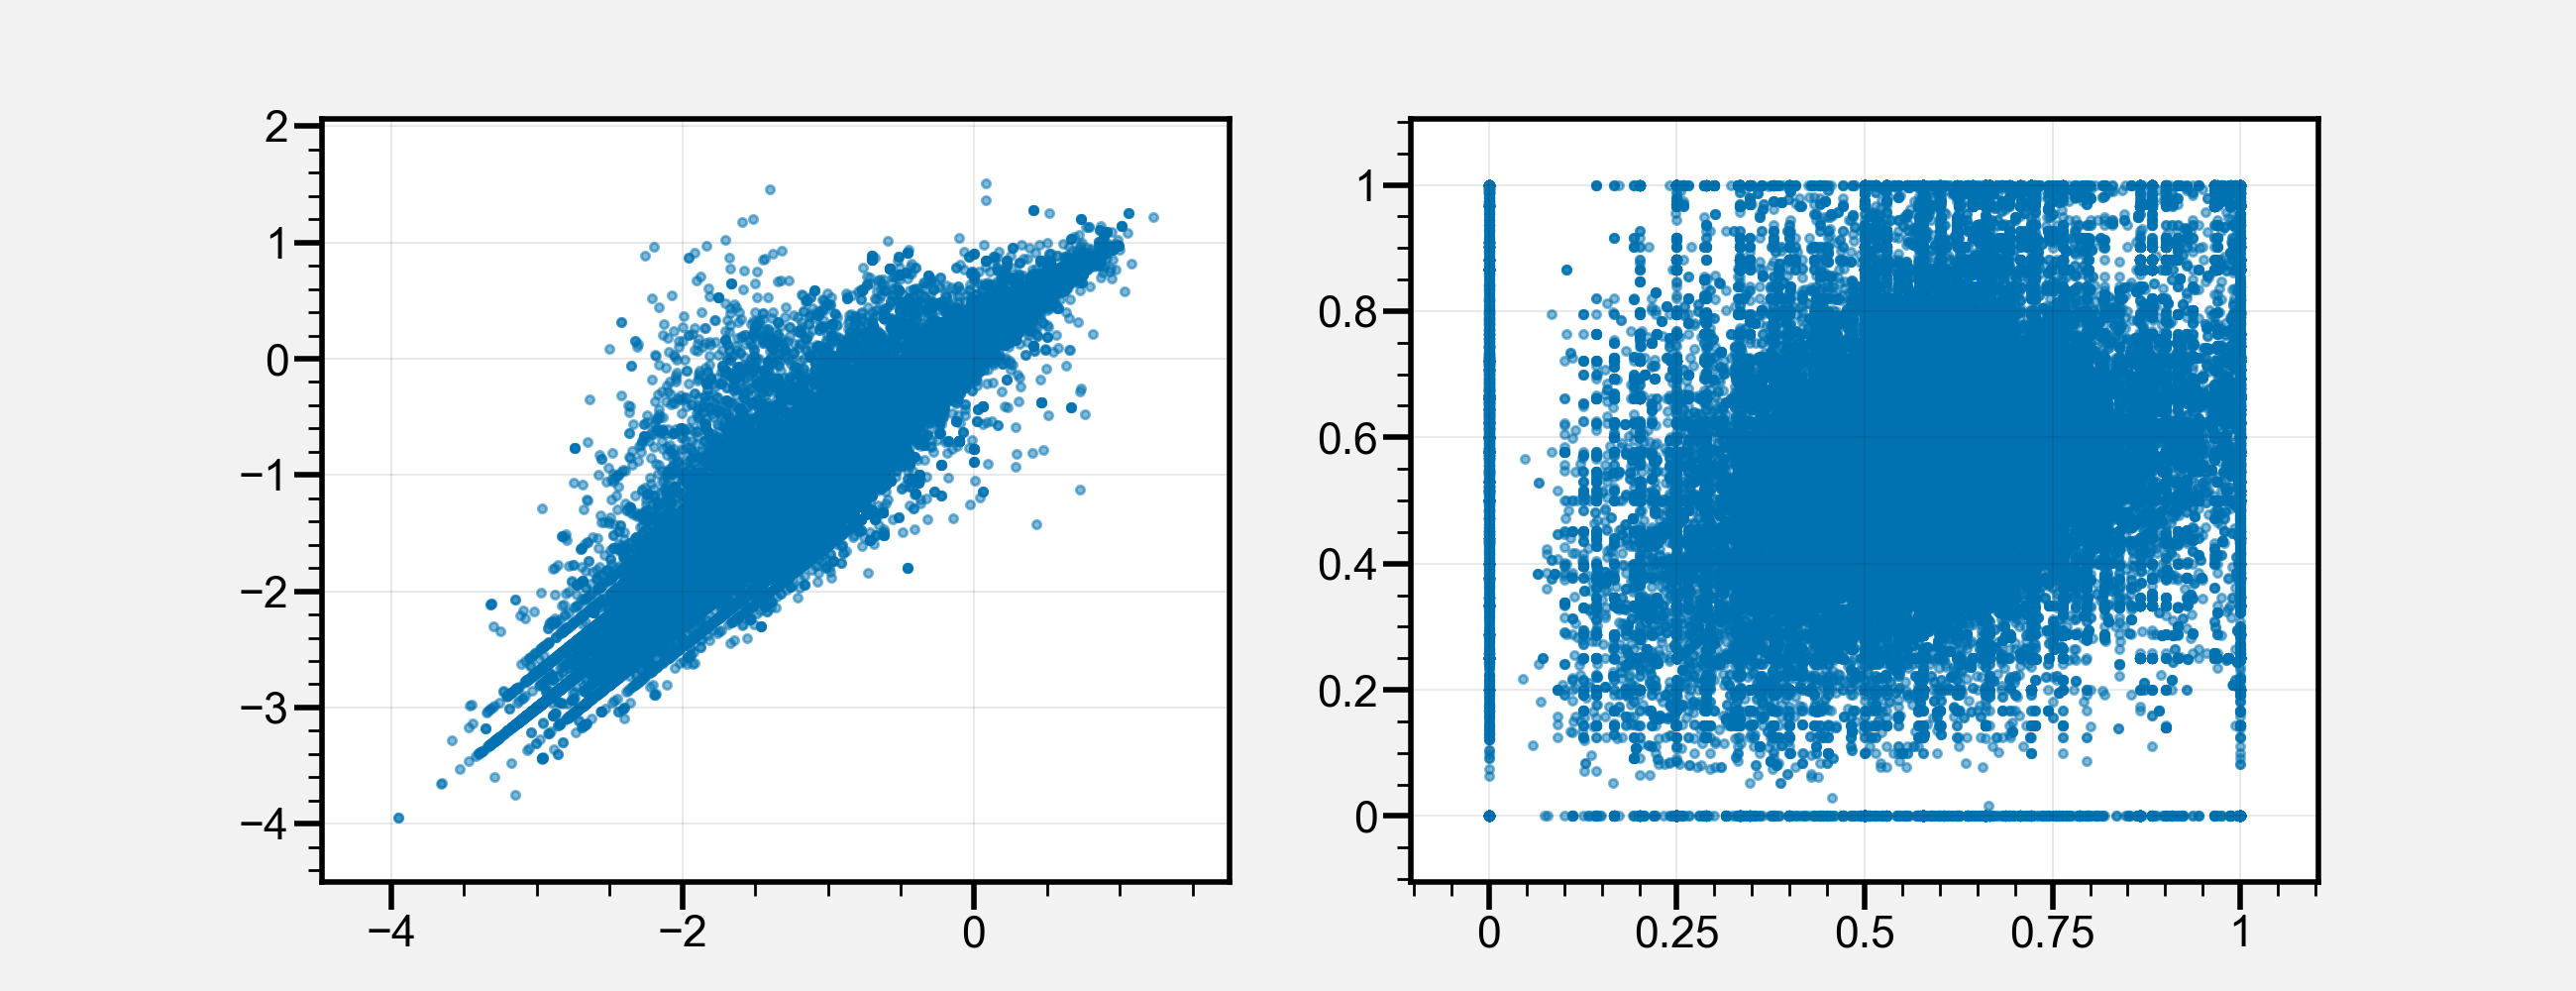

In [31]:
#merged_df.plot.scatter(x='read_density_star', y='read_density_kallisto', alpha=0.5, color='blue')#, logx=True, logy=True)
#fig, ax = plot.sub
#f, axs = plot.subplots(ncols=2, share=0)
fig, ax = plt.subplots(ncols=2, figsize=(13,5))
ax[0].scatter(x=np.log10(merged_df['read_density_star']), y=np.log10(merged_df['read_density_kallisto']), alpha=0.5)
#ax[0].set_xlim(-100, merged_df['read_density_star'].max())
#ax[0].set_ylim(-1, merged_df['read_density_kallisto'].max())
ax[1].scatter(x=merged_df['phase_score_star'], y=merged_df['phase_score_kallisto'], alpha=0.5)



## 

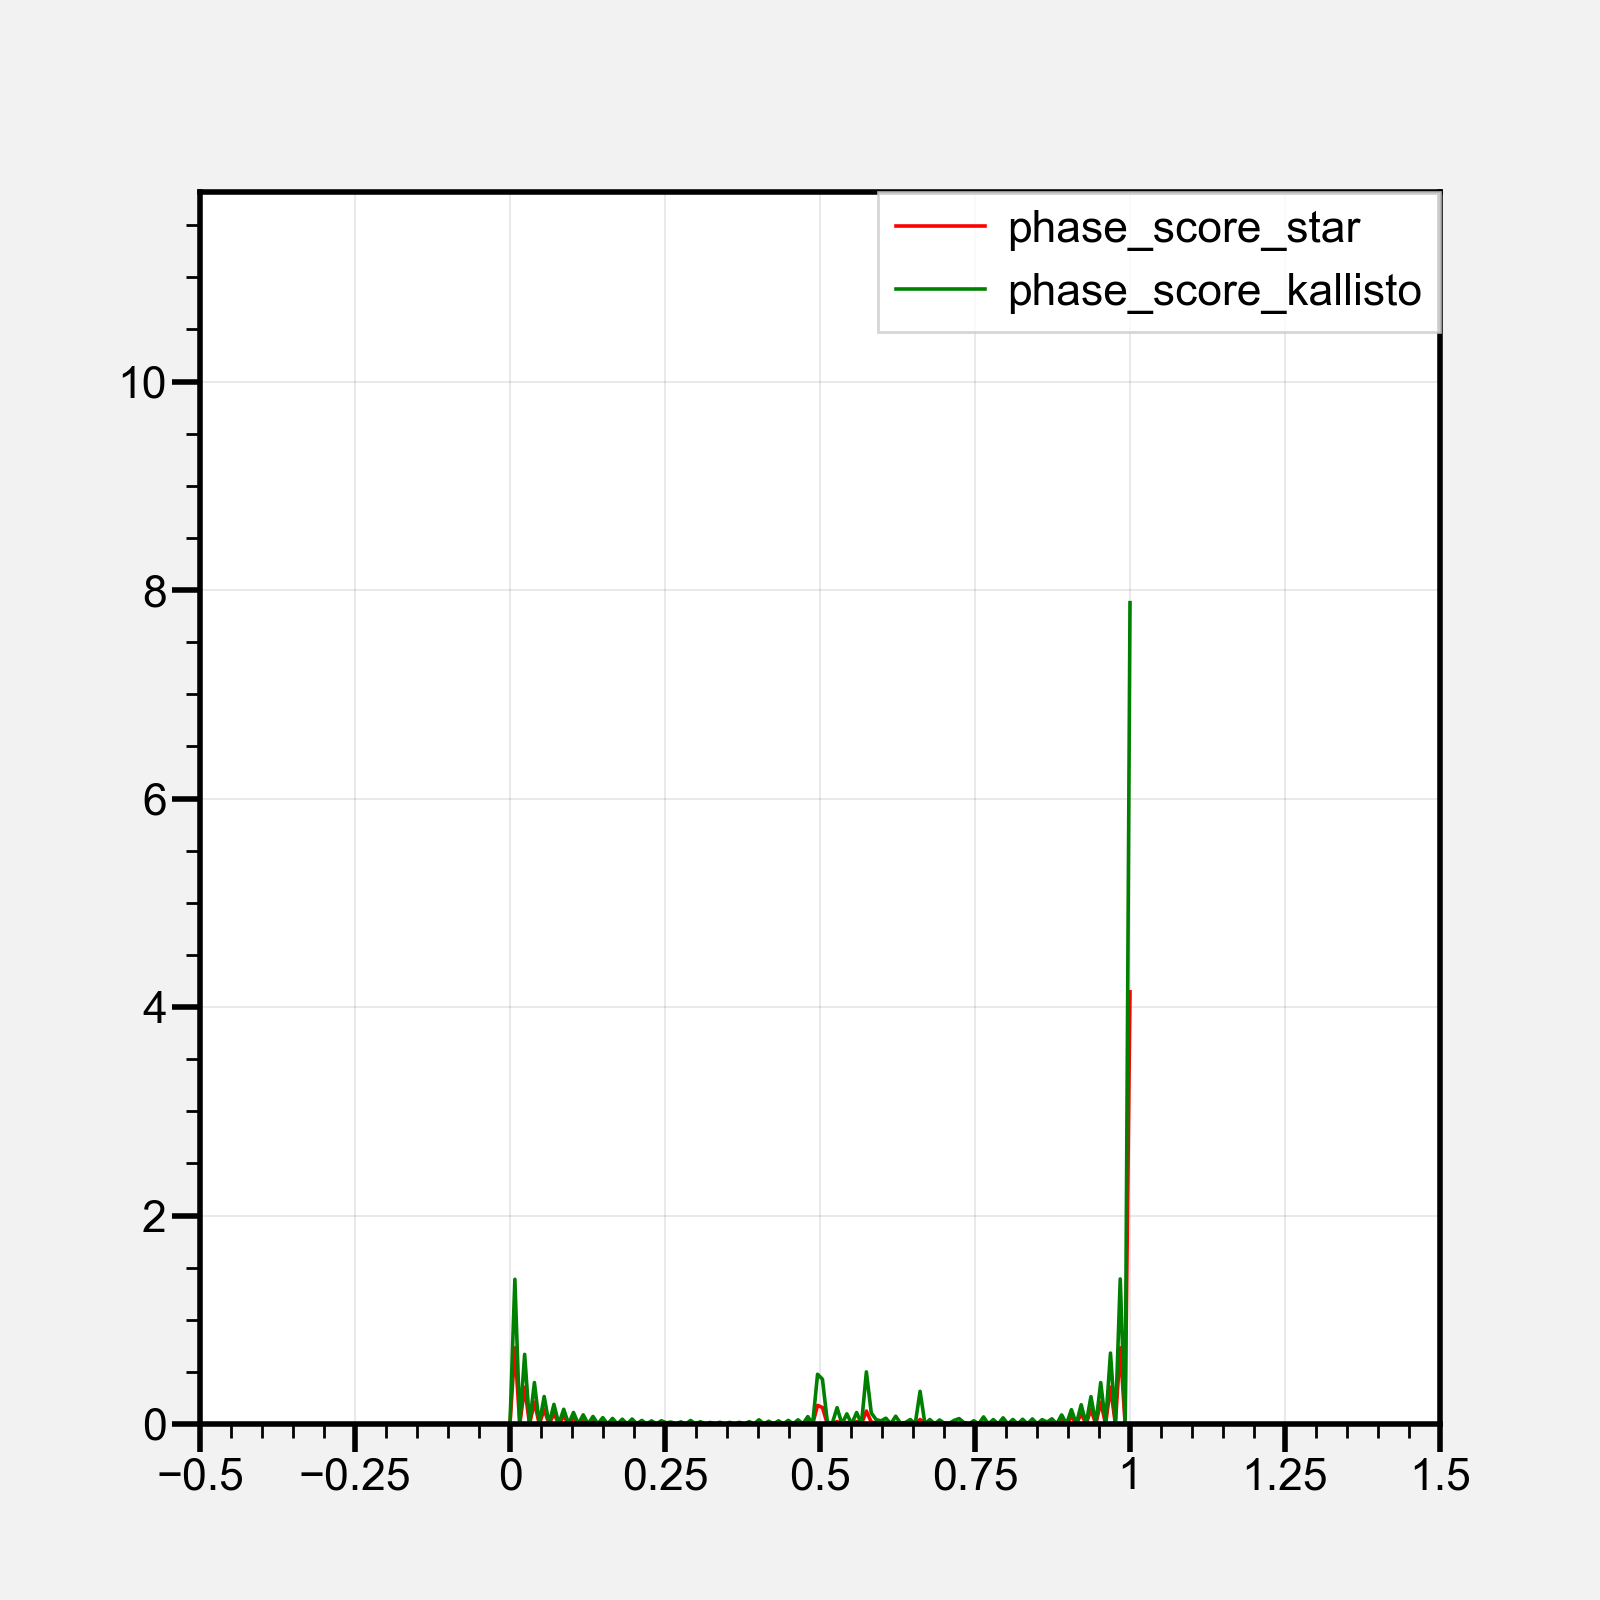

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
sns.kdeplot(merged_df['phase_score_star'], color='red')
sns.kdeplot(merged_df['phase_score_kallisto'], color='green')



In [21]:
The margin of space between axes edges and objects plotted inside the axes, if xlim and ylim are unset.



ORF_ID
ENST00000641515_65565_70005_978       0.0
ENST00000335137_69091_70005_915       0.0
ENST00000426406_450743_451678_936     0.0
ENST00000332831_685719_686654_936     0.0
ENST00000420190_924432_939291_1074    0.0
                                     ... 
ENST00000619109_21902_22024_123       0.0
ENST00000619109_21943_22011_69        0.0
ENST00000612315_32379_32525_147       0.0
ENST00000612315_31743_31838_96        0.0
ENST00000612315_31957_32487_531       0.0
Name: phase_score_kallisto, Length: 2679209, dtype: float64